# Sistem Rekomendasi Buku

Nama: I Gede Ari Wisnu Sanjaya

Asal: Bali

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/book-recommendation-dataset/Ratings.csv
/kaggle/input/book-recommendation-dataset/Users.csv
/kaggle/input/book-recommendation-dataset/Books.csv
/kaggle/input/book-recommendation-dataset/recsys_taxonomy2.png


## Data UnderStanding

Memberikan informasi seperti jumlah data, kondisi data, dan informasi mengenai data yang digunakan.

Menuliskan tautan sumber data (link download). https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset

Menguraikan seluruh variabel atau fitur pada data.

Melakukan beberapa tahapan yang diperlukan mengenai data, contohnya teknik visualisasi data beserta insight atau exploratory data analysis.

In [3]:
cd ../input/book-recommendation-dataset

/kaggle/input/book-recommendation-dataset


In [4]:
import pandas as pd
books = pd.read_csv('./Books.csv')
ratings = pd.read_csv('./Ratings.csv')
users = pd.read_csv('./Users.csv')

books.head()

/tmp/ipykernel_32/969192084.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('./Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [10]:
print("Shape Books Data : ", books.shape)
print("Shape Ratings Data : ", ratings.shape)
print("Shape Users Info Data : ", users.shape)

Shape Books Data :  (271360, 8)
Shape Ratings Data :  (1149780, 3)
Shape Users Info Data :  (278858, 3)


In [11]:
import numpy as np
df_all = np.concatenate([
    ratings["User-ID"].unique(),
    users["User-ID"].unique()
])

df_all = np.sort(np.unique(df_all))

print("Jumlah seluruh datasets: ", len(df_all))

Jumlah seluruh datasets:  278858


In [12]:
# Merge

df = pd.merge(books, ratings, on='ISBN', how='left')

df = pd.merge(df, users, on='User-ID', how='left')
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0,"timmins, ontario, canada",NaN
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0,"n/a, n/a, n/a",NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0,"sudbury, ontario, canada",NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032345 entries, 0 to 1032344
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1032345 non-null  object 
 1   Book-Title           1032345 non-null  object 
 2   Book-Author          1032344 non-null  object 
 3   Year-Of-Publication  1032345 non-null  object 
 4   Publisher            1032343 non-null  object 
 5   Image-URL-S          1032345 non-null  object 
 6   Image-URL-M          1032345 non-null  object 
 7   Image-URL-L          1032341 non-null  object 
 8   User-ID              1031136 non-null  float64
 9   Book-Rating          1031136 non-null  float64
 10  Location             1031136 non-null  object 
 11  Age                  753301 non-null   float64
dtypes: float64(3), object(9)
memory usage: 102.4+ MB


In [14]:
dtypes = pd.DataFrame(df.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=df.nunique().sort_values(ascending=True)

dtypes["Null Values"]=df.isnull().sum()

dtypes["% null Values"]=df.isnull().sum()/len(df)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(axis=0)

,Data Type,Unique Values,Null Values,% null Values
Age,float64,141,279044,0.270301
User-ID,float64,92106,1209,0.001171
Book-Rating,float64,11,1209,0.001171
Location,object,22480,1209,0.001171
Image-URL-L,object,271041,4,0.000004
Publisher,object,16807,2,0.000002
Book-Author,object,102023,1,0.000001
ISBN,object,271360,0,0.000000
Book-Title,object,242135,0,0.000000
Year-Of-Publication,object,202,0,0.000000


## Data Preparation

Menerapkan dan menyebutkan teknik data preparation yang dilakukan.

Teknik yang digunakan pada notebook dan laporan harus berurutan.

Menjelaskan proses data preparation yang dilakukan.

Menjelaskan alasan mengapa diperlukan tahapan data preparation tersebut.

Handling null Value, ini perlu sebab data yang digunakan jauh dari kata bersih / clean

In [15]:
df.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
User-ID                  1209
Book-Rating              1209
Location                 1209
Age                    279044
dtype: int64

In [16]:
df = df.dropna()


In [17]:
df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Location               0
Age                    0
dtype: int64

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 753296 entries, 0 to 1032344
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 753296 non-null  object 
 1   Book-Title           753296 non-null  object 
 2   Book-Author          753296 non-null  object 
 3   Year-Of-Publication  753296 non-null  object 
 4   Publisher            753296 non-null  object 
 5   Image-URL-S          753296 non-null  object 
 6   Image-URL-M          753296 non-null  object 
 7   Image-URL-L          753296 non-null  object 
 8   User-ID              753296 non-null  float64
 9   Book-Rating          753296 non-null  float64
 10  Location             753296 non-null  object 
 11  Age                  753296 non-null  float64
dtypes: float64(3), object(9)
memory usage: 74.7+ MB


In [19]:
df.shape

(753296, 12)

Filter Column yang akan kita gunakan, ini perlu karena tidak semua kolom akan kita gunakan, hanya kolom yang dirasa akan dibutuhkan oleh requirement tim pengembang

In [20]:
used_columns = ['ISBN','Book-Title','Book-Author','Publisher','Book-Rating','User-ID','Age',]
new_df = df[used_columns]

In [21]:
new_df.isnull().sum()

ISBN           0
Book-Title     0
Book-Author    0
Publisher      0
Book-Rating    0
User-ID        0
Age            0
dtype: int64

Banyak value yang unbalance, misal di bagian Publisher, ada 1 Publisher berisi 20.000 value sedangkan ada Publisher yang hanya berisi 1 value... maka dari itu akan kita proses Publisher yang value nya kurang dari 1000 akan kita drop atau hapus

In [22]:
for column in new_df.columns:
 print("\n" + column)
 print(new_df[column].value_counts())


ISBN
0971880107    2141
0316666343     920
0385504209     695
0060928336     509
0671027360     482
              ... 
0310490707       1
0811720896       1
0425063976       1
1572492546       1
0767409752       1
Name: ISBN, Length: 228996, dtype: int64

Book-Title
Wild Animus                                                                                                                       2141
The Lovely Bones: A Novel                                                                                                          920
The Da Vinci Code                                                                                                                  708
Bridget Jones's Diary                                                                                                              599
The Nanny Diaries: A Novel                                                                                                         573
                                                         

### Problem
Data terlalu banyak jadi cosine smiliarity sangat memakan waktu lama jadi akan kita buat conditions ketika Publisher kurang dari 500 akan kita drop, lalu akan kita drop juga ISBN yang sama agar mengurangi data

In [23]:
df_new = new_df.drop_duplicates(subset='ISBN')
df_new.shape

(228996, 7)

In [24]:
df_new.shape

(228996, 7)

In [25]:
counts = df_new['Publisher'].value_counts()
df = df_new[~df_new['Publisher'].isin(counts[counts < 50].index)]

In [26]:
df.shape

(172937, 7)

In [27]:
# counts = df['Book-Title'].value_counts()
# df = df[~df['Book-Title'].isin(counts[counts < 50].index)]

### EDA

In [28]:
df.shape

(172937, 7)

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 172937 entries, 0 to 1032344
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ISBN         172937 non-null  object 
 1   Book-Title   172937 non-null  object 
 2   Book-Author  172937 non-null  object 
 3   Publisher    172937 non-null  object 
 4   Book-Rating  172937 non-null  float64
 5   User-ID      172937 non-null  float64
 6   Age          172937 non-null  float64
dtypes: float64(3), object(4)
memory usage: 10.6+ MB


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


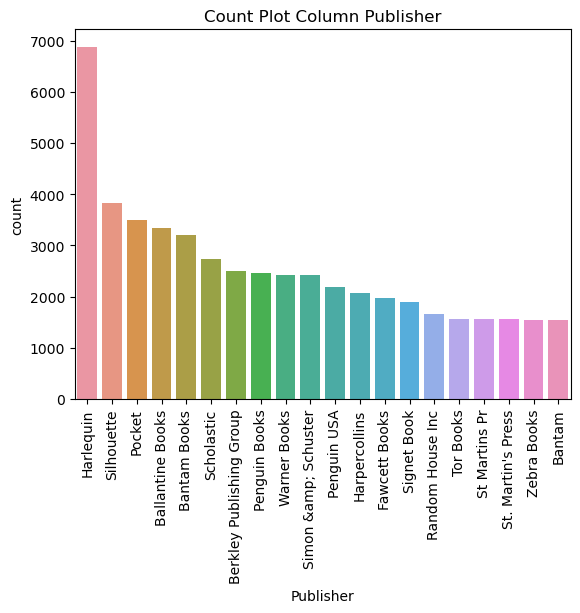

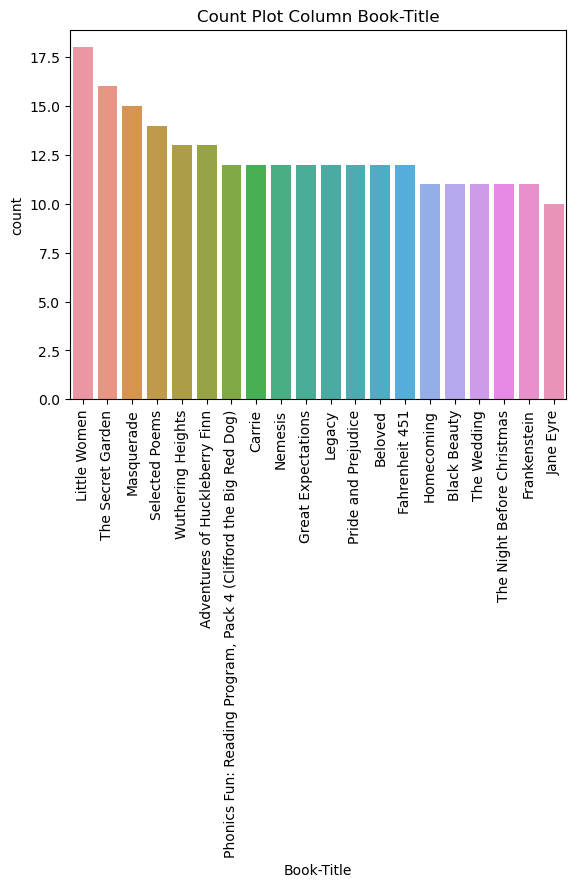

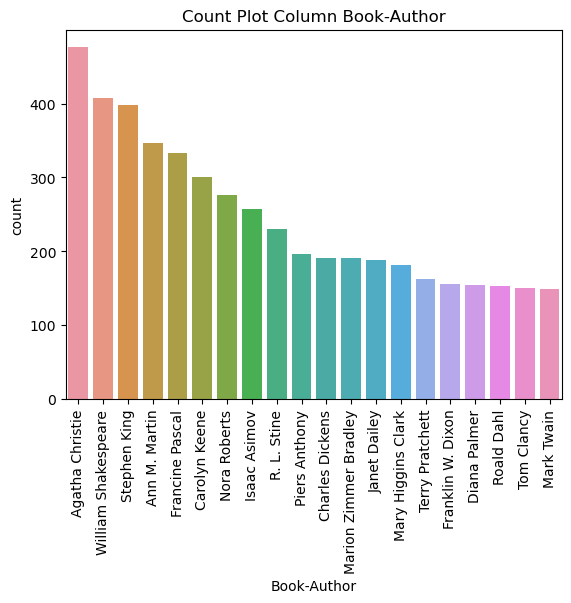

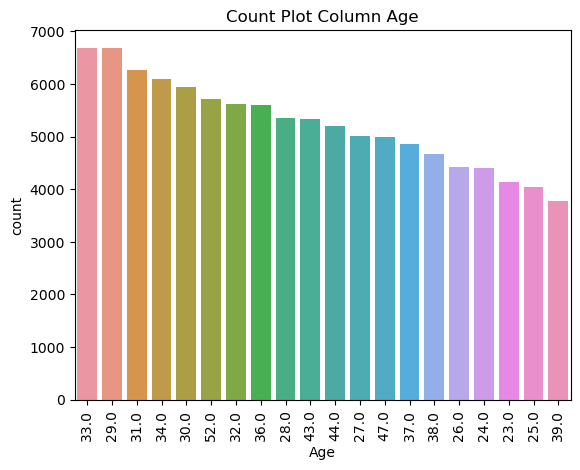

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_features = ["Publisher","Book-Title","Book-Author",'Age']

for col in range(len(cat_features)):
    plt.figure()
    plt.xticks(rotation=90)
    plt.title(f'Count Plot Column {cat_features[col]}')
    sns.countplot(x = cat_features[col],data = df, order = df[cat_features[col]].value_counts().iloc[:20].index)

label encoder untuk mengubah data kategorikal menjadi data number

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ISBN_le'] = le.fit_transform(df['ISBN'])
df['Publisher_le'] = le.fit_transform(df['Publisher'])
df['Book-Author_le'] = le.fit_transform(df['Book-Author'])
df['Book-Title_le'] = le.fit_transform(df['Book-Title'])


/tmp/ipykernel_32/2776266920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ISBN_le'] = le.fit_transform(df['ISBN'])
/tmp/ipykernel_32/2776266920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Publisher_le'] = le.fit_transform(df['Publisher'])
/tmp/ipykernel_32/2776266920.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

/tmp/ipykernel_32/4136554616.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


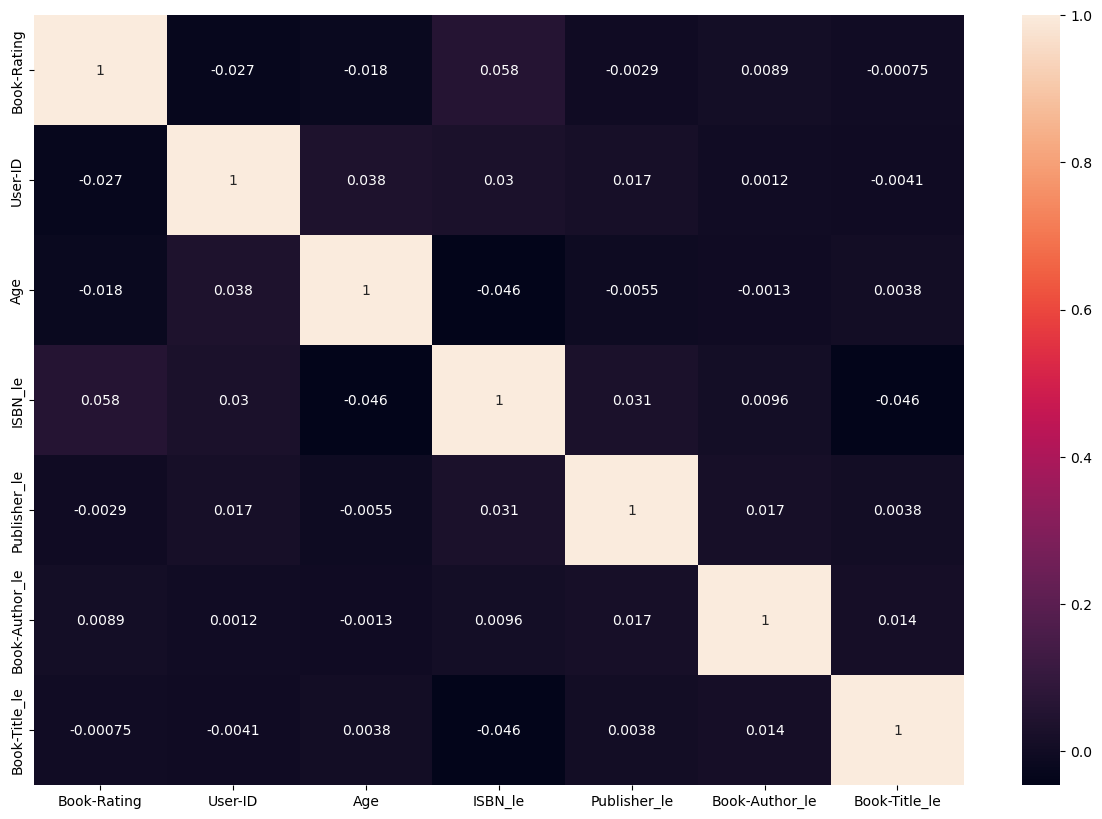

In [32]:
# Сorrelation matrix
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(), annot=True)
plt.show()


In [108]:
df.reset_index(drop=True)

,Book-Rating,User-ID,Book-Title
0,7.0,4581,31371
1,0.0,2651,46872
2,0.0,2594,33701
3,10.0,3347,10315
4,0.0,1293,9363
...,...,...,...
99995,0.0,2002,4951
99996,0.0,2017,54798
99997,9.0,822,36015
99998,0.0,348,12411


## Modeling and Result

### Consine Similiarity/Content Base Similiarity

Membuat dan menjelaskan sistem rekomendasi untuk menyelesaikan permasalahan

Menyajikan top-N recommendation sebagai output.

Menyajikan dua solusi rekomendasi dengan algoritma yang berbeda.

Menjelaskan kelebihan dan kekurangan pada pendekatan yang dipilih.

Cosine similarity mengukur kesamaan antara dua vektor dan menentukan apakah kedua vektor tersebut menunjuk ke arah yang sama. Ia menghitung sudut cosinus antara dua vektor. Semakin kecil sudut cosinus, semakin besar nilai cosine similarity.

Metrik ini sering digunakan untuk mengukur kesamaan dokumen dalam analisis teks. Sebagai contoh, dalam studi kasus ini, cosine similarity digunakan untuk mengukur kesamaan nama restoran dan nama masakan.

Maka dari itu saya gunakan Similarity untuk mencari kesamaan _Publisher_ dan _age_ untuk rekomendasi

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# cv = CountVectorizer(lowercase=False)

# cosim_df = cv.fit_transform(df['Book-Author'])
# cosine_sim = cosine_similarity(cosim_df)

In [107]:
df.isnull().sum()


Book-Rating    0
User-ID        0
Book-Title     0
dtype: int64

In [36]:
df = df.dropna()

In [106]:
df.isnull().sum()

Book-Rating    0
User-ID        0
Book-Title     0
dtype: int64

In [104]:
def recommend_books_to_you(df_resm, publisher, age):
 try:

    age_publisher_data = df_resm[(df_resm['Age'] == age) & (df_resm['Publisher_le'] == publisher)]
    similar_books = df_resm.copy()

    book_prop = similar_books.loc[:, ['ISBN_le']]

    similar_books['Similarity with books'] = cosine_similarity(book_prop, book_prop.to_numpy()[age_publisher_data.index[0], None]).squeeze()

    similar_books.rename(columns={'Publisher_le': f'Similar with Publisher id {publisher}'}, inplace=True)
    similar_books['Book-Author_le'] = le.inverse_transform(similar_books['Book-Author_le'])
    similar_books['Book-Title_le'] = le.inverse_transform(similar_books['Book-Title_le'])
    similar_books = similar_books.sort_values(by='Similarity with books', ascending=False)
    similar_books = similar_books[['ISBN_le', f'Similar with Publisher id {publisher}', 'Book-Author_le', 'Age','Book-Title_le']]

    similar_books.reset_index(drop=True, inplace=True)

    return similar_books.iloc[1:7]
 except Exception as e:
    print('error: ', e)


top recommended Books

In [105]:
recommend_books_to_you(df,370,46)

error:  'Age'


## Colaborative Filtering
Untuk Colaborative filtering yang akan saya gunakan adalah User-ID, Book-Title , Book-Rating, Book-Author, dan Age

baca datasets

In [44]:
import pandas as pd
books = pd.read_csv('./Books.csv')
ratings = pd.read_csv('./Ratings.csv')
users = pd.read_csv('./Users.csv')

books.head()


/tmp/ipykernel_32/1619341691.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('./Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [45]:
ratings.head()


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [46]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


merge semua data yang diperlukan

In [63]:
df = pd.merge(books, ratings, on='ISBN', how='left')

df = pd.merge(df, users, on='User-ID', how='left')
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0,"timmins, ontario, canada",NaN
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0,"n/a, n/a, n/a",NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0,"sudbury, ontario, canada",NaN


handling null value

In [64]:
df.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
User-ID                  1209
Book-Rating              1209
Location                 1209
Age                    279044
dtype: int64

In [66]:
df = df.dropna()


In [67]:
df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Location               0
Age                    0
dtype: int64

ambil 100.000 sample

In [68]:
df = df.sample(n=100000)

In [69]:
df = df.reset_index(drop=True)

pilih column yang diperlukan

In [71]:
df = df[['Book-Rating', 'User-ID', 'Book-Title']]

In [72]:
df

,Book-Rating,User-ID,Book-Title
0,6.0,170077.0,What Looks Like Crazy On An Ordinary Day
1,0.0,33974.0,You Can Do It!: Balloon Animals
2,5.0,121170.0,Slightly Single (Red Dress Ink (Paperback))
3,0.0,46909.0,Find Me
4,8.0,128696.0,9-11
...,...,...,...
99995,7.0,170947.0,The Runaway Heart &amp; a Promise of the Valle...
99996,7.0,210485.0,Crisis on Doona
99997,0.0,113292.0,FIRST CITIZEN
99998,9.0,69389.0,Split Second (Maggie O'Dell Novels (Paperback))


Encode fitur User-ID dan Book-Title 

In [73]:
user_ids = df['User-ID'].unique().tolist()
book_ids = df['Book-Title'].unique().tolist()

Menyandikan (encode) fitur ‘User-ID’ dan ‘Book-Title’ ke dalam indeks integer.

Memetakan ‘User-ID’ dan ‘Book-Title’ ke dataframe yang berkaitan.

Mengecek beberapa hal dalam data seperti jumlah user, jumlah buku, kemudian mengubah Book-Rating menjadi float.

In [74]:
# Melakukan encoding msno
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
 
# Melakukan proses encoding angka ke ke msno
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

# Melakukan proses encoding song
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
 
# Melakukan proses encoding angka ke song
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

# Mapping user ke dataframe user
df['User-ID'] = df['User-ID'].map(user_to_user_encoded)
 
# Mapping song ke dataframe song
df['Book-Title'] = df['Book-Title'].map(book_to_book_encoded)

# Mengubah target menjadi nilai float
df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)

# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah book
num_book = len(book_encoded_to_book)
print(num_book)

18813
54887


/tmp/ipykernel_32/2543824063.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User-ID'] = df['User-ID'].map(user_to_user_encoded)
/tmp/ipykernel_32/2543824063.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Book-Title'] = df['Book-Title'].map(book_to_book_encoded)
/tmp/ipykernel_32/2543824063.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [92]:
# Mengacak Datasets
df = df.sample(frac=1, random_state=42)
df

,Book-Rating,User-ID,Book-Title
48298,7.0,4581,31371
81047,0.0,2651,46872
92754,0.0,2594,33701
46007,10.0,3347,10315
76981,0.0,1293,9363
...,...,...,...
93878,0.0,2002,4951
99783,0.0,2017,54798
57399,9.0,822,36015
97106,0.0,348,12411


Split dengan rasio 8:2

80.000 data train

20.000 data val

In [76]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = df[['User-ID', 'Book-Title']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Book-Rating']
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

Membuat Recommender Net berikut example nya

https://keras.io/examples/structured_data/collaborative_filtering_movielens/

In [89]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings resto
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

Compile model dengan loss RMSE

In [ ]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [93]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
10000/10000 [==============================] - 263s 26ms/step - loss: -4052.2625 - root_mean_squared_error: 4.2492 - val_loss: -2145.7007 - val_root_mean_squared_error: 4.2167
Epoch 2/100
10000/10000 [==============================] - 265s 26ms/step - loss: -4433.8931 - root_mean_squared_error: 4.2492 - val_loss: -2360.5173 - val_root_mean_squared_error: 4.2166
Epoch 3/100
10000/10000 [==============================] - 266s 27ms/step - loss: -4902.5957 - root_mean_squared_error: 4.2492 - val_loss: -2583.6792 - val_root_mean_squared_error: 4.2166
Epoch 4/100
10000/10000 [==============================] - 266s 27ms/step - loss: -5313.8672 - root_mean_squared_error: 4.2492 - val_loss: -2816.4961 - val_root_mean_squared_error: 4.2165
Epoch 5/100
10000/10000 [==============================] - 258s 26ms/step - loss: -5764.7012 - root_mean_squared_error: 4.2492 - val_loss: -3059.7671 - val_root_mean_squared_error: 4.2166
Epoch 6/100
10000/10000 [==============================] - 2

## Evaluation
Menyebutkan metrik evaluasi yang digunakan. RMSE

Menjelaskan hasil proyek berdasarkan metrik evaluasi.

Menjelaskan metrik evaluasi yang digunakan untuk mengukur kinerja model (formula dan cara metrik tersebut bekerja).

rmse = $\sqrt{\sum\nolimits_{n=1}^n \left((y_i - ŷ_i) ^ 2 \over n \right) }$
 

Visualisasi Metrix untuk Melihat error dalam bentuk grafik

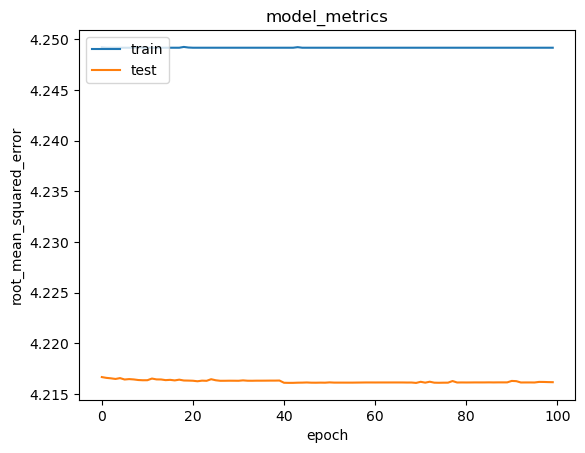

In [109]:
import matplotlib.pyplot as plt

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [240]:
books = pd.read_csv('./Books.csv')
ratings = pd.read_csv('./Ratings.csv')
df_test =pd.merge(books, ratings, on='ISBN', how='left')
df_test = df_test[['Book-Rating','User-ID', 'Book-Title']]
df_test.head()

/tmp/ipykernel_32/3661365508.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('./Books.csv')


,Book-Rating,User-ID,Book-Title
0,0.0,2.0,Classical Mythology
1,5.0,8.0,Clara Callan
2,0.0,11400.0,Clara Callan
3,8.0,11676.0,Clara Callan
4,0.0,41385.0,Clara Callan


In [241]:
user_id = df_test['User-ID'].sample(1).iloc[0]
book_read_by_user = df_test[df_test['User-ID'] == user_id]

book_read_by_user

,Book-Rating,User-ID,Book-Title
6211,0.0,252848.0,Breathing Lessons
10541,0.0,252848.0,"If Love Were Oil, I'd Be About a Quart Low"
11762,0.0,252848.0,Slow Waltz in Cedar Bend
19827,0.0,252848.0,October Sky: A Memoir
20432,0.0,252848.0,A Painted House
...,...,...,...
971279,0.0,252848.0,The Big Book of Show Business Awards
971282,0.0,252848.0,"The 5-Day Miracle Diet: Conquer Food Cravings,..."
971287,0.0,252848.0,Doctor Who: Ultimate Foe
971290,0.0,252848.0,"Greece: Temples, Tombs, &amp; Treasures (Lost ..."


In [242]:
import pandas as pd
test_books = pd.read_csv('./Books.csv')
test_ratings = pd.read_csv('./Ratings.csv')
test_users = pd.read_csv('./Users.csv')

df = pd.merge(test_books, test_ratings, on='ISBN', how='left')

df = pd.merge(df, test_users, on='User-ID', how='left')
df.head()
df = df.sample(n=100000)
df = df.reset_index(drop=True)
df = df[['Book-Rating', 'ISBN', 'User-ID', 'Book-Title']]
df.isnull().sum()

/tmp/ipykernel_32/2170549860.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  test_books = pd.read_csv('./Books.csv')


Book-Rating    89
ISBN            0
User-ID        89
Book-Title      0
dtype: int64

In [243]:
book_df = df

In [244]:
book_df

,Book-Rating,ISBN,User-ID,Book-Title
0,0.0,0425151875,126492.0,Tom Clancy's Op-Center: Games of State (Tom Cl...
1,0.0,0373118155,274308.0,Mischief And Marriage (Top Author) (Harlequin ...
2,0.0,0743456254,28591.0,"A Loving Scoundrel (Lindsey, Johanna)"
3,8.0,0345404912,129074.0,The Last Full Measure
4,0.0,0843951400,271245.0,Against All Enemies
...,...,...,...,...
99995,0.0,0142003190,41086.0,A Noble Radiance
99996,0.0,1576731278,16777.0,Stories for the Heart: The Original Collection
99997,0.0,0446341231,35809.0,Mountain Guns
99998,0.0,0590442341,126736.0,Jessi's Secret Language (Baby-Sitters Club (Pa...


In [245]:
book_not_read = book_df[~book_df['Book-Title'].isin(book_read_by_user['Book-Title'].values)]['Book-Title'] 
book_not_read = list(
    set(book_not_read)
    .intersection(set(book_to_book_encoded.keys()))
)
len(book_not_read)

22566

In [246]:
book_not_read = [[book_to_book_encoded.get(x)] for x in book_not_read]

user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)


In [247]:
len(user_book_array) - len([x for x in user_book_array if x is not None])


0

In [248]:
ratings = model.predict(user_book_array).flatten()
ratings

706/706 [==============================] - 1s 1ms/step


array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [287]:
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_read[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('book with high ratings from user')
print('----' * 8)
 
top_book_user = (
    book_read_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
)
print(top_book_user['Book-Title']) 
book_df_rows = book_df[book_df['ISBN'].isin(top_book_user)]
for row in book_df_rows.head(5).itertuples():
    print(row.name)
 
print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)
 
recommended_book = book_df[book_df['Book-Title'].isin(recommended_book_ids)]
for row in recommended_book.head(10).itertuples():
    print(row._4)

Showing recommendations for users: 252848.0
book with high ratings from user
--------------------------------
971246                     The Rolling Stone Book of Comedy
101744                                    WLD ACCORDNG GARP
620005    Writer's Market 2000: 8,000 Editors Who Buy Wh...
303744                                          Beach Music
551332     The Grass Is Always Greener Over the Septic Tank
Name: Book-Title, dtype: object
--------------------------------
Top 10 book recommendation
--------------------------------
Wizard and Glass (The Dark Tower, Book 4)
Wizard and Glass (The Dark Tower, Book 4)
Slow Hand: Women Writing Erotica
The Seven Dials Mystery (St. Martin's Minotaur Mysteries)
Wizard and Glass (The Dark Tower, Book 4)
Wizard and Glass (The Dark Tower, Book 4)
The Devil in Bellminster: An Unlikely Mystery (Unlikely Heroes)
Vintage Affair (Harlequin Romance, No 3158)
The Seven Dials Mystery (St. Martin's Minotaur Mysteries)
Wizard and Glass (The Dark Tower, Book 4